In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

# ✅ Q1 – Annual Crime Trends (2001–2013)

Question:
- Compute the total number of victims per year and analyze any patterns or fluctuations in crime rates over the years (2001–2012).

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv
- 01_District_wise_crimes_committed_IPC_2013.csv
- 01_District_wise_crimes_committed_IPC_2014.csv

Useful Columns
- STATE/UT
- YEAR
- TOTAL IPC CRIMES

## 🔹 Step 1: Loading The Dataset for the year 2001 - 2013

In [27]:
# Load the main IPC crimes file (2001–2012)
ipc_df_2012 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2001_2012.csv")
ipc_df_2013 = pd.read_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2013.csv")

# Merge the two dataframes
ipc_df = pd.concat([ipc_df_2012, ipc_df_2013], ignore_index=True)

# Save the merged dataframe to a CSV file
ipc_df.to_csv(r"E:\0. VS Code\PrepGrad Minor project csvs\01_District_wise_crimes_committed_IPC_2001_2013.csv", index=False)

# Display the first few rows of the dataframe
ipc_df.sample(10)

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
2602,NAGALAND,MOKOKCHUNG,2004,6,3,0,1,0,1,1,...,2,11,0,0,1,0,0,5,12,62
4254,UTTAR PRADESH,GHAZIABAD,2006,146,143,51,29,0,29,109,...,5,61,41,26,93,190,0,386,1252,4207
8496,JHARKHAND,RANCHI,2012,145,77,13,52,0,52,76,...,16,347,11,22,1,45,0,236,326,2396
6703,ASSAM,JORHAT,2010,50,6,1,51,0,51,68,...,12,318,0,60,0,163,0,150,355,1763
9116,Bihar,GAYA,2013,208,49,6,45,0,45,208,...,4,875,37,0,0,212,0,320,3610,7816
1837,MAHARASHTRA,SOLAPUR RURAL,2003,112,50,6,44,0,44,22,...,30,726,4,52,0,130,0,395,854,3230
1815,MAHARASHTRA,LATUR,2003,56,34,0,21,0,21,15,...,37,950,31,49,2,80,0,154,956,3074
4868,PUNJAB,JALANDHAR,2007,63,118,32,54,0,54,113,...,14,615,12,48,2,120,0,240,878,3855
9333,Karnataka,HAVERI,2013,16,31,0,18,0,18,14,...,0,251,1,80,0,55,0,239,890,2157
4457,BIHAR,JAMUI,2007,51,30,1,46,0,46,31,...,16,340,8,12,0,20,0,48,568,1593


## 🔹 Step 2: Clean Column Names

In [28]:
# Normalize column names: remove whitespace, lowercase, and replace spaces
ipc_df.columns = ipc_df.columns.str.strip().str.upper().str.replace(' ', '_')

## 🔹 Step 3: Checking Column Info and null values

In [29]:
ipc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9840 entries, 0 to 9839
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT_TO_MURDER                                    9840 non-null   int64 
 5   CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL_RAPE                                       9840 non-null   int64 
 8   OTHER_RAPE                                           9840 non-null   int64 
 9

In [30]:
# Preview columns to identify crime columns
ipc_df.columns.tolist()

['STATE/UT',
 'DISTRICT',
 'YEAR',
 'MURDER',
 'ATTEMPT_TO_MURDER',
 'CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER',
 'RAPE',
 'CUSTODIAL_RAPE',
 'OTHER_RAPE',
 'KIDNAPPING_&_ABDUCTION',
 'KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS',
 'KIDNAPPING_AND_ABDUCTION_OF_OTHERS',
 'DACOITY',
 'PREPARATION_AND_ASSEMBLY_FOR_DACOITY',
 'ROBBERY',
 'BURGLARY',
 'THEFT',
 'AUTO_THEFT',
 'OTHER_THEFT',
 'RIOTS',
 'CRIMINAL_BREACH_OF_TRUST',
 'CHEATING',
 'COUNTERFIETING',
 'ARSON',
 'HURT/GREVIOUS_HURT',
 'DOWRY_DEATHS',
 'ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY',
 'INSULT_TO_MODESTY_OF_WOMEN',
 'CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES',
 'IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES',
 'CAUSING_DEATH_BY_NEGLIGENCE',
 'OTHER_IPC_CRIMES',
 'TOTAL_IPC_CRIMES']

In [31]:
# Get the count of each unique value in the State/UT column
state_counts = ipc_df['STATE/UT'].value_counts()

# Print the count of each unique value
print(state_counts)

STATE/UT
UTTAR PRADESH     878
MADHYA PRADESH    628
MAHARASHTRA       552
BIHAR             540
TAMIL NADU        469
                 ... 
Daman & Diu         3
Puducherry          3
Chandigarh          2
D&N Haveli          2
Lakshadweep         2
Name: count, Length: 70, dtype: int64


## 🔹 Step 4: Group by Year

In [32]:
# Group by YEAR to get total crimes per year
yearly_trend = ipc_df.groupby('YEAR')['TOTAL_IPC_CRIMES'].sum().reset_index()
yearly_trend

,YEAR,TOTAL_IPC_CRIMES
0,2001,3538616
1,2002,3560660
2,2003,3432240
3,2004,3664020
4,2005,3645204
5,2006,3756586
6,2007,3979346
7,2008,4186758
8,2009,4242690
9,2010,4449662


## 🔹 Step 5: Visualization

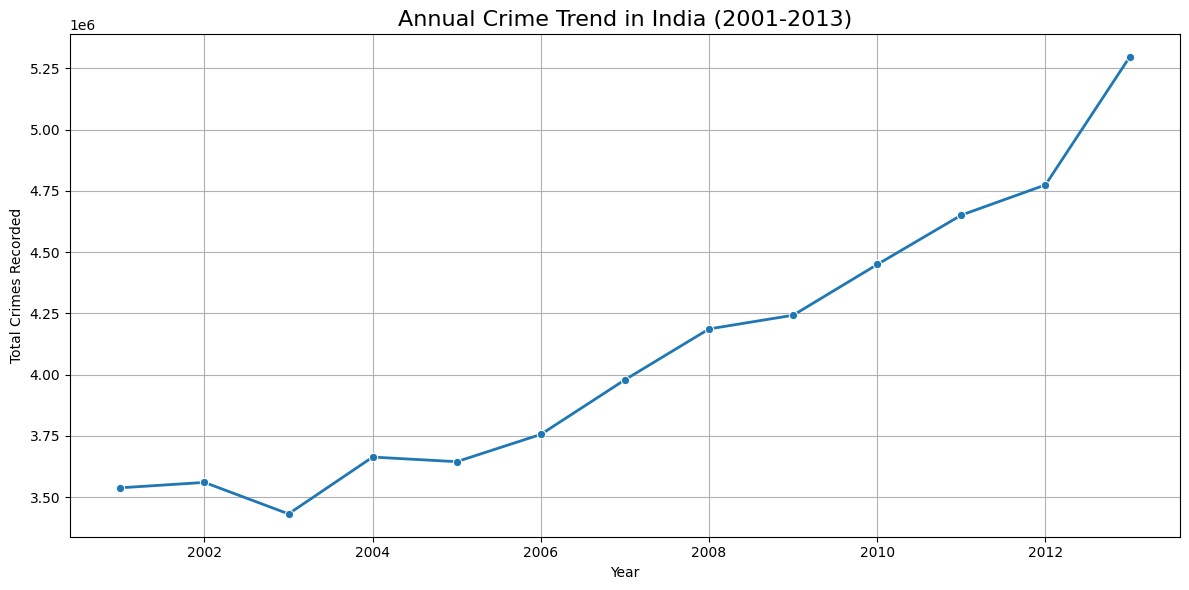

In [33]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trend, x='YEAR', y='TOTAL_IPC_CRIMES', marker='o', linewidth=2)

plt.title('Annual Crime Trend in India (2001-2013)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Crimes Recorded')
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Observation

- The graph highlights the trend of total crime victims recorded in India from 2001 to 2012.

- Trend: Crime numbers increased steadily from 2001 to 2011, with a slight dip in 2004 and 2008.

- There appears to be a steady increase in crime over the years, which may be influenced by population growth, improved crime reporting, or socio-political changes.

- Spike: A significant spike can be observed in 2011–2012, which could be explored further in later questions.

# ✅ Q2: State-Wise Crime Analysis (2001–2013)

Question:
- Perform a comprehensive analysis of various crimes recorded in each state over the given period. Identify trends, anomalies, and patterns.

Objectives: 
- Analyze various crimes recorded in each state across the years 2001 to 2012. 
- Identify:
    - Trends over time per state
    - High-crime and low-crime states
    - Any anomalies or unexpected changes

Files of Use:
- 01_District_wise_crimes_committed_IPC_2001_2012.csv
- 01_District_wise_crimes_committed_IPC_2013.csv
- 01_District_wise_crimes_committed_IPC_2014.csv

Useful Columns
- STATE/UT
- YEAR
- TOTAL IPC CRIMES

## 🔹 Step 1: Group by State and Year

In [34]:
# Group data to get total crimes per state per year
state_yearly_crimes = ipc_df.groupby(['STATE/UT', 'YEAR'])['TOTAL_IPC_CRIMES'].sum().reset_index()

## 🔹 Step 2: Create Pivot Table
This helps visualize crime trends across states over years.

In [35]:
# Normalize state names
state_yearly_crimes['STATE/UT'] = state_yearly_crimes['STATE/UT'].str.strip().str.upper()  # or use .str.title() if you prefer that

# Now re-create the pivot table
crime_pivot = state_yearly_crimes.pivot_table(index='STATE/UT', columns='YEAR', values='TOTAL_IPC_CRIMES', aggfunc='sum')


In [ ]:
# Fill NaN values with 0 for better visualization
crime_pivot = crime_pivot.fillna(0)

## 🔹 Step 3: Visualization – Heatmap of Crimes Across States

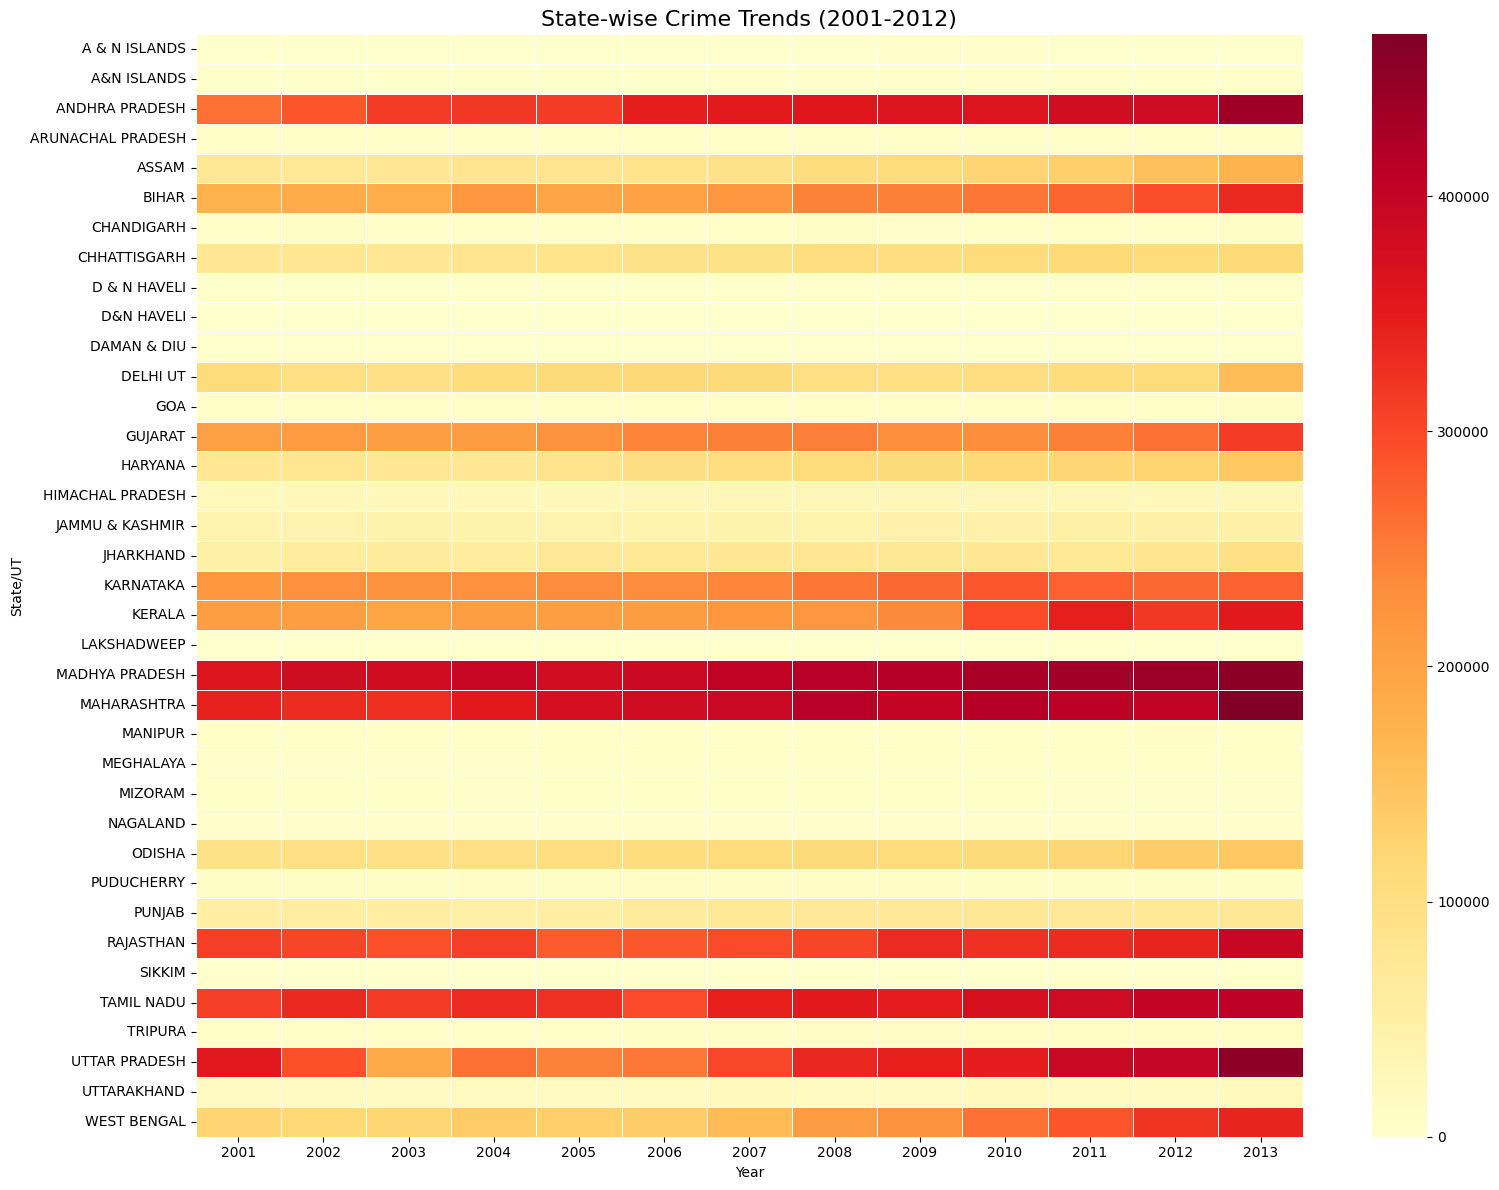

In [37]:
plt.figure(figsize=(16, 12))
sns.heatmap(crime_pivot, cmap='YlOrRd', linewidths=0.5)

plt.title("State-wise Crime Trends (2001-2012)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("State/UT")
plt.tight_layout()
plt.show()


## 🔍 Observation

- The state shows a steady increase in crime from 2001 to 2008.

- There may be a sharp spike around 2010–2012 — this could be due to changes in crime recording or law enforcement activity.

- High crime states: Maharashtra, Madhya Pradesh, Uttar Pradesh, and Andhra Pradesh consistently show the highest total IPC crimes.

- Moderate crime: States like Tamil Nadu, Karnataka, Bihar, and Gujarat show steady increases over time.

- Low crime zones: UTs and smaller northeastern states (e.g., Lakshadweep, Mizoram, Daman & Diu) report minimal crime.

- Overall trend: Most states show a gradual rise in crimes year over year.